Code to extract the frequency estimates from the no byzantine with varied white tiles test

In [1]:
import os
import random

import numpy as np
import pandas as pd
from jedi.api import file_name

# folder_names = ["experiment_test1"]
number_of_experiments = 10
number_of_robots = 20
#In this context, an experiment refers to a set of 10 (subject to change) runs of the simulation with that config

# harm_df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine_0.75/no_byzantine75.csv")

# harm_diff = harm_df.median() #putting loads of shit on the end for some reason
harm_diff = 1.780535

def get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        estimate_list = []
        path_to_data = experiment_name + folder_name + "/"
        print(path_to_data)
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"

            df = pd.read_csv(path_to_robot, sep=" ")
            if "Estimate" in df.columns:
                #Need to filp it, have the actual percentages as the col names
                last_estimate = df["Estimate"].iloc[-1]
                difference = 100 * (abs(last_estimate - 0.75))
                # difference = df["TIMESTAMP"].iloc[-1]
                estimate_list.append(difference)

                # new_row = pd.DataFrame([[folder_name, last_estimate]], columns=estimate_df.columns)
                # estimate_df = pd.concat([estimate_df, new_row], ignore_index=True)
        estimate_df[folder_name] = estimate_list

    print(os.getcwd())
    print(estimate_df)
    print(estimate_df.mean())
    estimate_df.to_csv(file_name + ".csv", index=False)

folder_names = ["1","2","3","4","5","6","7","8"]
# folder_names = ["byzantine_03_40_no_byz_time"]
exp_names = ["byzantine_05"]

for exp in exp_names:
    get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, exp, "collected_results/" + exp  + "/" + exp + "_")

collected_results/byzantine_05/byzantine_05_1/
collected_results/byzantine_05/byzantine_05_2/
collected_results/byzantine_05/byzantine_05_3/
collected_results/byzantine_05/byzantine_05_4/
collected_results/byzantine_05/byzantine_05_5/
collected_results/byzantine_05/byzantine_05_6/
collected_results/byzantine_05/byzantine_05_7/
collected_results/byzantine_05/byzantine_05_8/
/home/zak-22/arg/toychain-argos/HelloNeighbor/results
          1         2         3         4         5         6          7  \
0  5.038500  4.296111  0.437843  2.430833  1.621778  4.079167   0.367692   
1  0.584561  0.213056  0.006078  1.270833  0.392667  7.102310  25.295000   
2  0.917719  0.453981  0.555882  2.200233  2.748000  2.464762   0.794615   
3  1.297719  2.079815  0.647451  0.125000  3.199556  6.467032  25.619833   
4  3.502807  1.864630  0.628333  2.829583  1.053111  6.317310   6.005000   
5  0.976140  2.030556  0.620980  2.166250  3.693000  1.992381  26.294333   
6  1.046667  1.586481  4.327059  0.833

In [2]:
def convert_strobel_byzantine(filename, save_name, attribute):
    convert_df = pd.DataFrame()
    strobel = pd.read_csv("data_strobel_et_al2019/" +filename)
    for i in range(8):
        arr = []
        for index, row in strobel.iterrows():
            if row["byz"] == i:
                arr.append(row[attribute])
        print(len(arr), i, filename)
        convert_df[str(i)] = pd.Series(arr)

    convert_df.to_csv(save_name + ".csv", index=False)
    
def convert_strobel_time(filenames, col_names, save_name):
    convert_df = pd.DataFrame()
    
    for i in range(len(filenames)):
        arr = []
        strobel = pd.read_csv("data_strobel_et_al2019/" + filenames[i])
    
        for index, row in strobel.iterrows():
            if row["byz"] == 0:
                arr.append(row["clock"])
        convert_df[col_names[i]] = pd.Series(arr)
    convert_df.to_csv(save_name + ".csv", index=False)
        
    
def convert_strobel_No(filename, save_name, attribute):
    convert_df = pd.DataFrame()
    strobel = pd.read_csv("data_strobel_et_al2019/" +filename)
    for i in range(11):
        arr = []
        for index, row in strobel.iterrows():
            if row["actual"] == (i*10):
                arr.append(row[attribute])
        print(len(arr), i, filename)
        convert_df[str(i)] = pd.Series(arr)
    
    convert_df.to_csv(save_name + ".csv", index=False)
    
    
file_names = ["3_Threshold_Byzantine_1.csv", "3_Threshold_Byzantine_2.csv","3_Threshold_Byzantine_3.csv"]
col_names = ["LCP","WSMR","PoW"]

convert_strobel_time(file_names, col_names, "StrobelConsensusTimes")

# convert_strobel_byzantine("3_Threshold_Byzantine_3.csv", "Strobel_consensus_time","clock")
# file_arr = ["1_Plain_1.csv","1_Plain_2.csv","1_Plain_3.csv"]
# name_arr = ["Strobel_LCP_No","Strobel_WSMR_No","Strobel_Blockchain_No"]
# 
# file_arr_byz = ["2_Byzantine_1.csv","2_Byzantine_2.csv","2_Byzantine_3.csv"]
# save_arr_byz = ["Strobel_LCP_Byzantine_time", "Strobel_WSMR_byzantine_time","Strobel_Blockchain_byzantine_time"]
# 
# 
# for i in range(len(file_arr_byz)):
#     convert_strobel_byzantine(file_arr_byz[i], save_arr_byz[i])
    
# for i in range(len(file_arr)):
#     convert_strobel_No(file_arr[i], name_arr[i] + "AE", "absError")
#     convert_strobel_No(file_arr[i], name_arr[i] + "pred", "predicted")

Creating the box plots for the no byzantine data actual tile estimated

In [3]:
number_of_experiments = 10
number_of_robots = 20

folder_names = ["8","9","10","11","12","13","14","15","16","17","18","19"]

def get_byzantine_blocks(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        path_to_data = experiment_name + folder_name + "/"
        byzantine_blocks = []
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"
            df = pd.read_csv(path_to_robot, sep=" ")
            if "Byzantine" in df.columns:
                for index, row in df.iterrows():
                    byzantine_blocks.append(row["Byzantine"])

        byzantine_fraction = sum(byzantine_blocks) / len(byzantine_blocks)
        estimate_df[folder_name] = [byzantine_fraction]
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

# get_byzantine_blocks(folder_names,10,20,"byzantine_blocks","collected_results/vote_test/byzantine_")

Actual percentage of white tiles vs estimate vary grid size

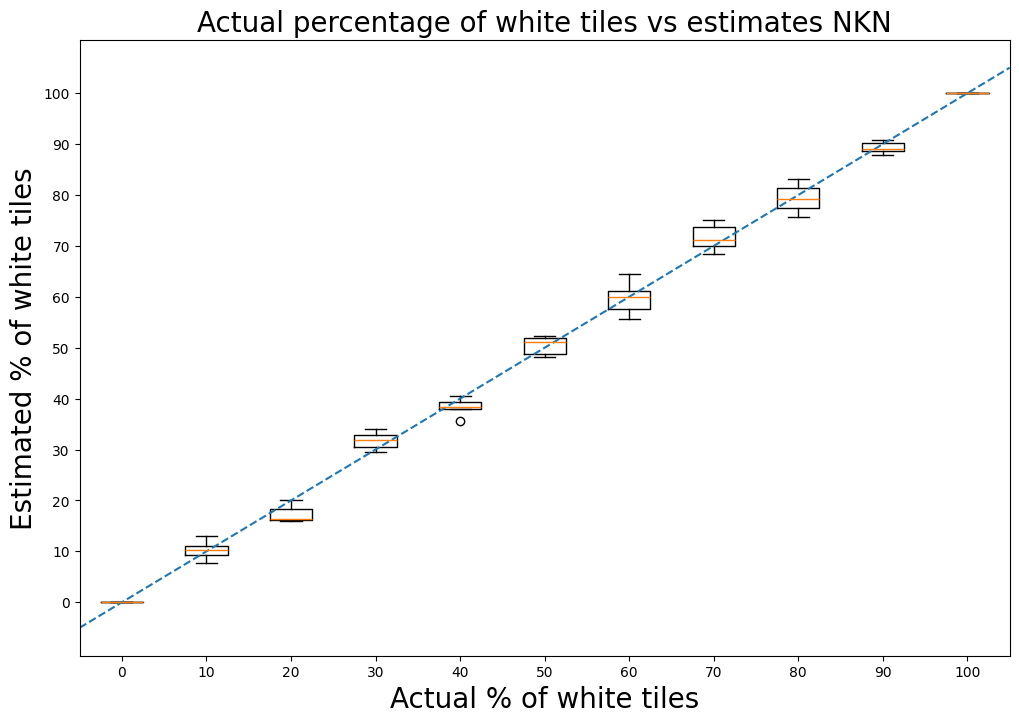

<Figure size 1200x800 with 0 Axes>

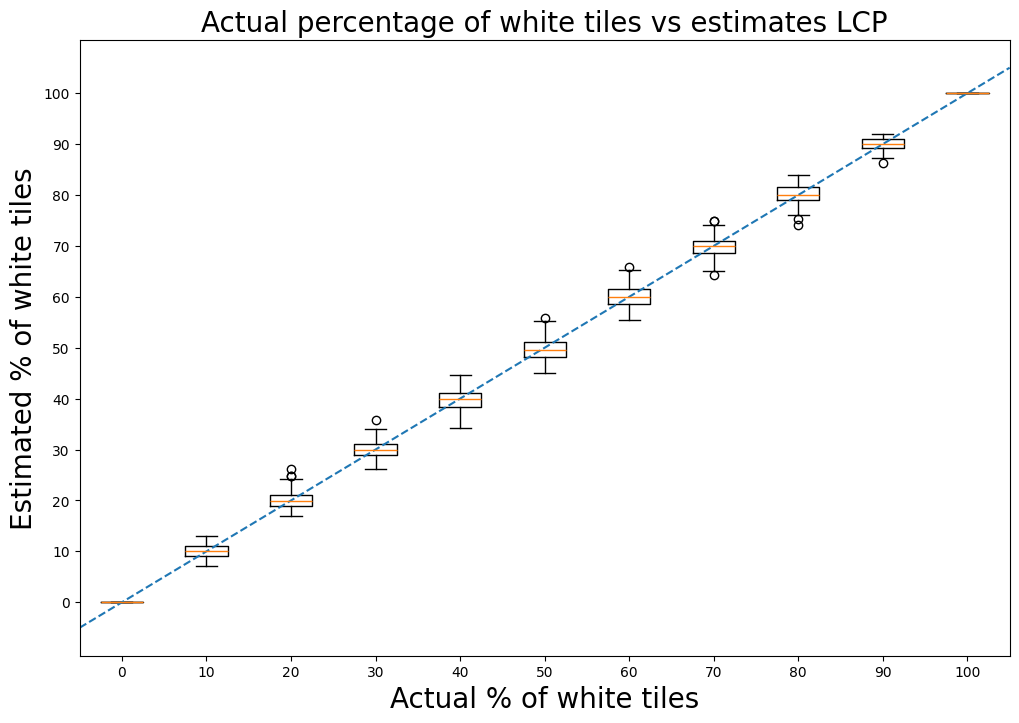

<Figure size 1200x800 with 0 Axes>

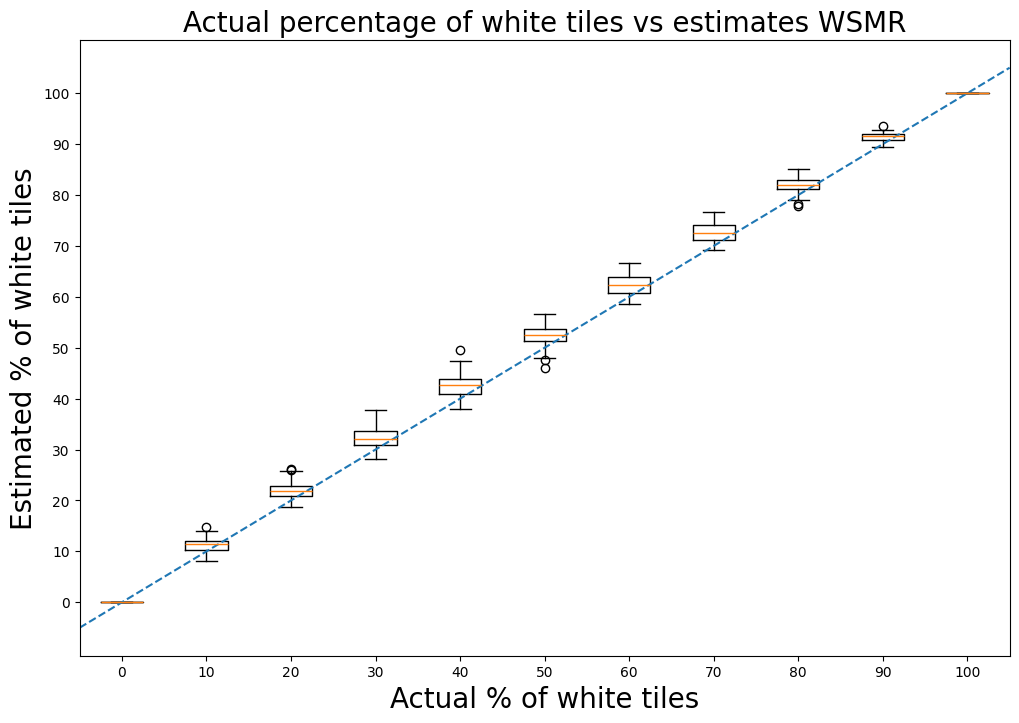

<Figure size 1200x800 with 0 Axes>

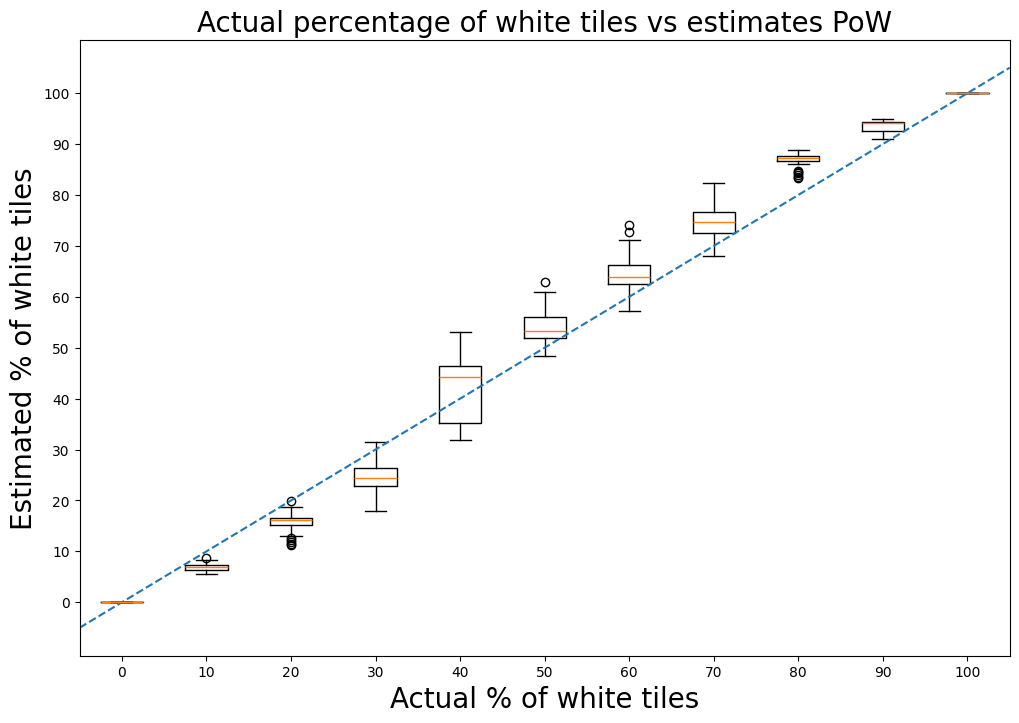

<Figure size 1200x800 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
df_NKN = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/vary_tiles_no_byzantine.csv")
df_POW = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_Nopred.csv")
df_LCP = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_Nopred.csv")
df_WSMR= pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_Nopred.csv")

name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_Actual","LCP_Actual","WSMR_Actual","PoW_Actual"]



actual_df_arr = [df_NKN, df_LCP, df_WSMR, df_POW]


def plot_actual_vs_estimate(df, title, save_name):
    fig, ax = plt.subplots(figsize = (12,8))
    
    plt.figure(figsize = (12,8))
    actual_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.plot([x_min,x_max], [y_min,y_max], "--")
    
    ax.set_yticks([x*10 for x in range(11)])
    
    
    ax.set_title("Actual percentage of white tiles vs estimates " + title, fontsize=20)
    ax.set_ylabel("Estimated % of white tiles", fontsize = 20)
    ax.set_xlabel("Actual % of white tiles", fontsize = 20)
    
    plt.tight_layout()
    fig.savefig(save_name)
    plt.show()
    
for i in range(len(actual_df_arr)):
    plot_actual_vs_estimate(actual_df_arr[i], name_arr[i], save_name[i])

NKN mean: 1.5481761389231417
LCP mean: 1.1685342477272729
WSMR mean: 1.8279731286363636
PoW mean: 3.9857220303030303


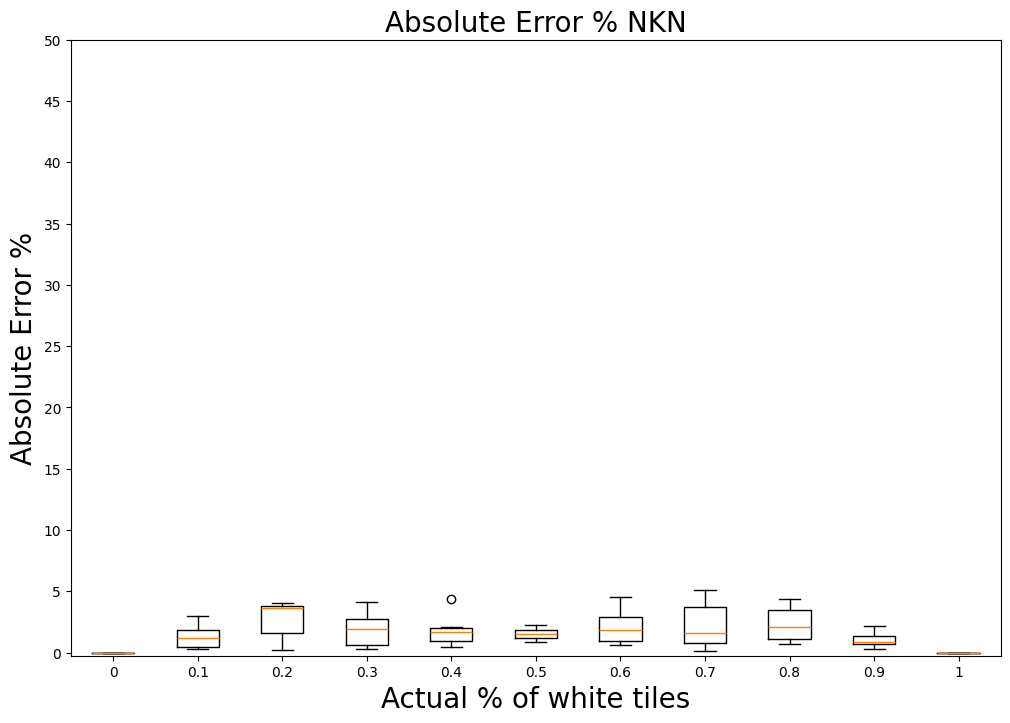

<Figure size 1200x800 with 0 Axes>

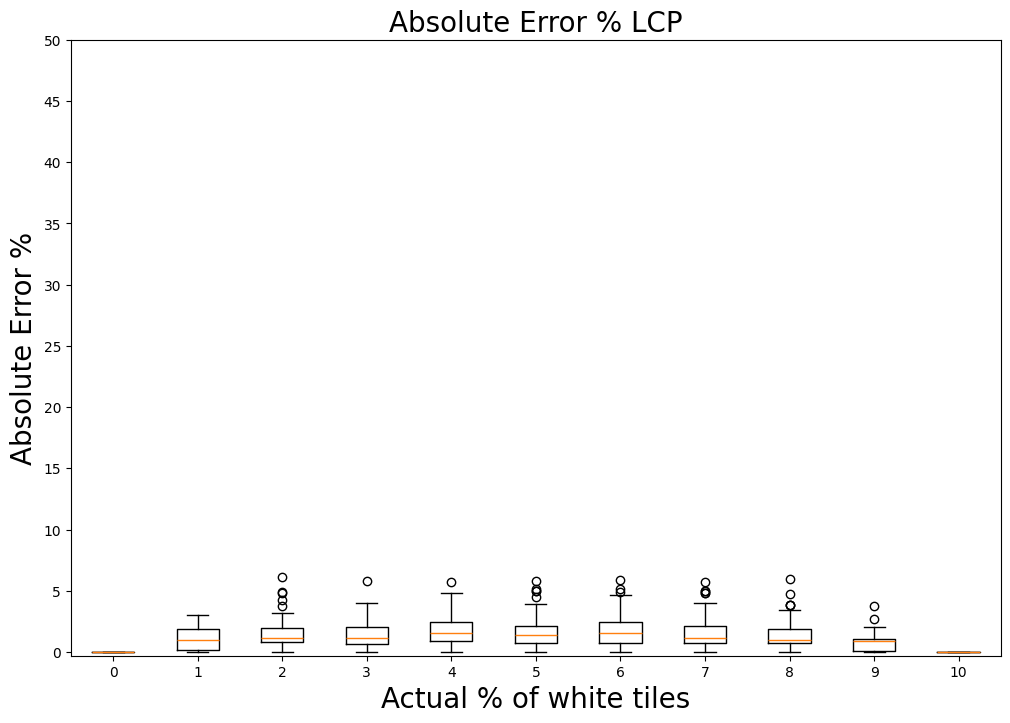

<Figure size 1200x800 with 0 Axes>

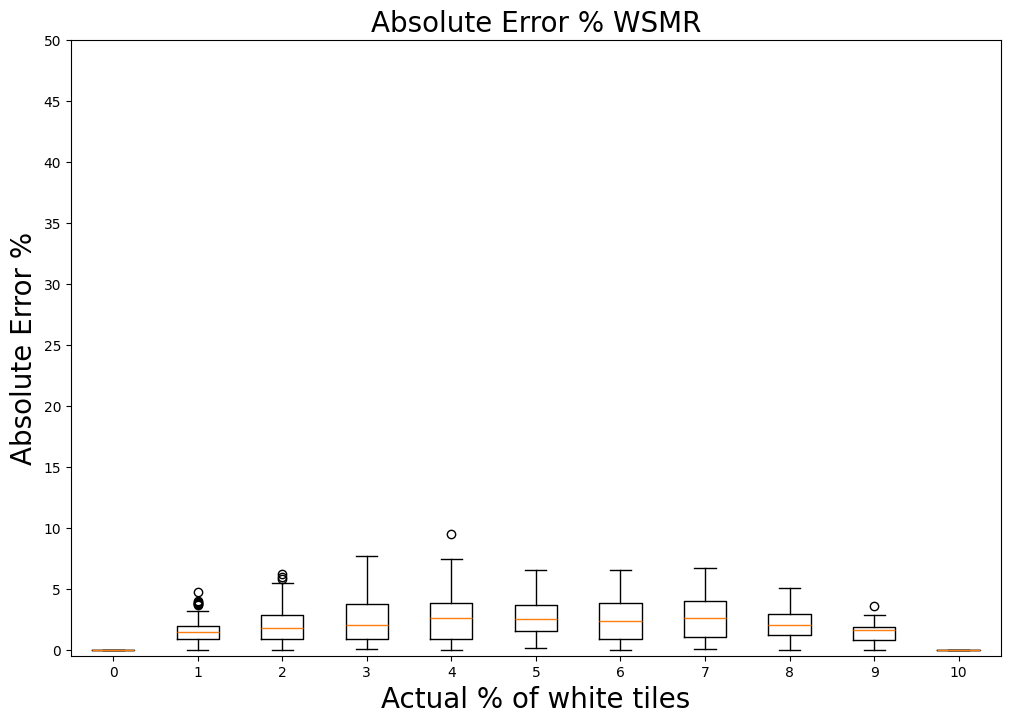

<Figure size 1200x800 with 0 Axes>

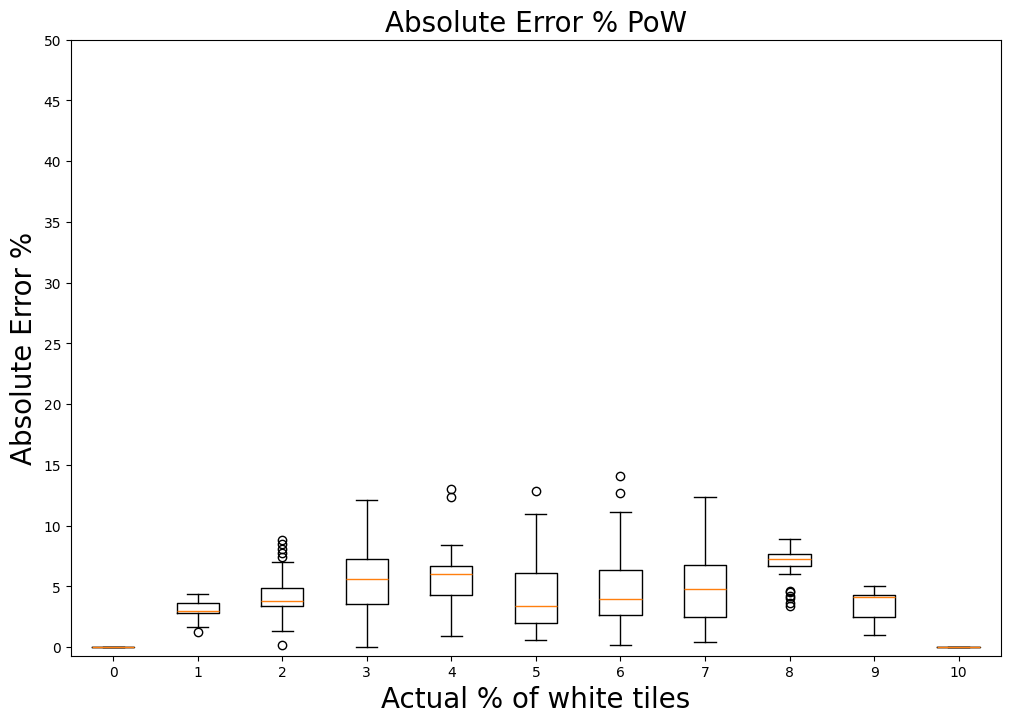

<Figure size 1200x800 with 0 Axes>

In [5]:
df_NKN = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/vary_tiles_no_byzantine_AE.csv")
df_PoW = pd.read_csv("//home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_NoAE.csv")
df_LCP = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_NoAE.csv")
df_WSMR = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_NoAE.csv")

df_arr = [df_NKN, df_LCP,  df_WSMR, df_PoW]
name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_AE","LCP_AE","WSMR_AE","PoW_AE"]

def get_mean_AE(df):
    return sum(df.mean()) / len(df.mean())

for i in range(len(df_arr)):
    print(f"{name_arr[i]} mean: {get_mean_AE(df_arr[i])}")

def plot_AE_no_byz(df, title, save_name):
    fig, ax = plt.subplots(figsize = (12,8))

    plt.figure(figsize = (12,8))
    AE_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)
    
    ax.set_yticks([x for x in range(51) if x % 5 ==0])
    
    ax.set_title("Absolute Error % " + title, fontsize = 20)
    ax.set_ylabel("Absolute Error %", fontsize = 20)
    ax.set_xlabel("Actual % of white tiles", fontsize = 20)
    fig.savefig(save_name)
    plt.show()
    
for i in range(len(actual_df_arr)):
    plot_AE_no_byz(df_arr[i], name_arr[i], save_name[i])

In [6]:
df_NKN = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine_03_40.csv")
df_PoW = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_Blockchain_byzantine_time.csv")
df_LCP = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_LCP_Byzantine_time.csv")
df_WSMR = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel/Strobel_WSMR_byzantine_time.csv")

df_arr = [df_NKN, df_LCP,  df_WSMR, df_PoW]
name_arr = ["NKN","LCP","WSMR","PoW"]
save_name = ["NKN_Byz_AE","LCP_Byz_AE","WSMR_Byz_AE","PoW_Byz_AE"]

for i in range(len(df_arr)):
    print(f"{name_arr[i]} mean: {get_mean_AE(df_arr[i])}")

def plot_save_loess_byzantine(df, title, filename):
    df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

    plt.figure(figsize = (12,8))
    fig, ax = plt.subplots(figsize = (12,8))

    x = np.arange(1, df.shape[1] + 1)
    y = df.median()

    smoothed = lowess(y, x, frac=0.6)

    ax.plot(smoothed[:,0], smoothed[:,1], "r-")


    AE_box = ax.boxplot([df[col] for col in df.columns],
                tick_labels = df.columns,
                patch_artist = False)

    ax.set_yticks([x for x in range(50) if x % 5 ==0])

    ax.set_title(title, fontsize = 20)
    ax.set_ylabel("Absolute Error %", fontsize=20)
    ax.set_xlabel("No of Byzantine robots", fontsize=20)
    fig.savefig(filename)
    plt.show()


NKN mean: 2.697239266802114
LCP mean: 30.760160064867037
WSMR mean: 15.569857150424635
PoW mean: 8.501067461170814


Plotting the AE for the different outlier thresholds

NameError: name 'lowess' is not defined

<Figure size 1200x800 with 0 Axes>

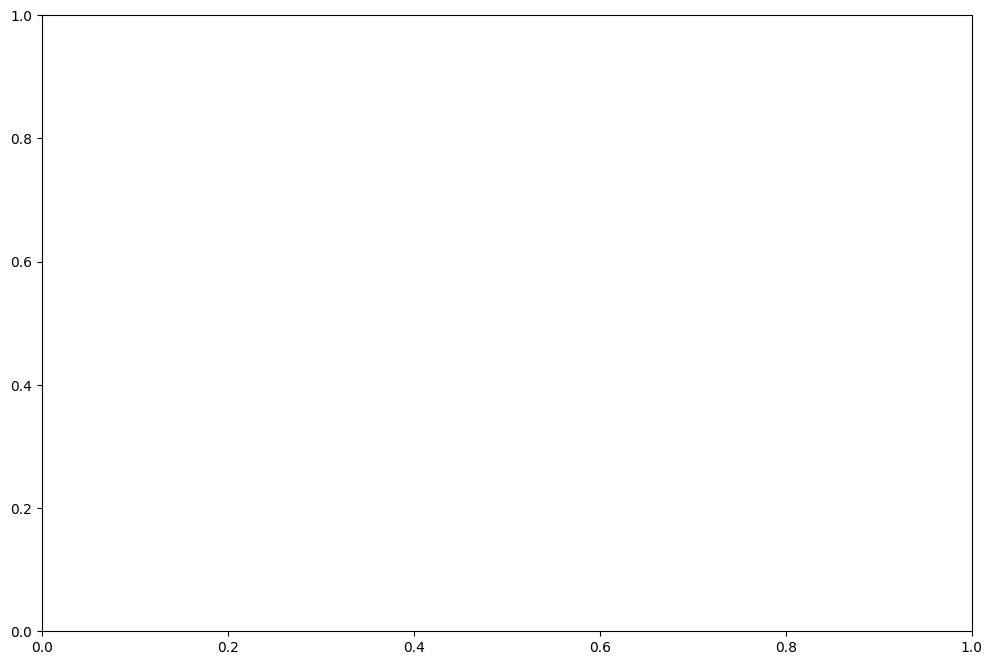

In [7]:
df_02 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/compare_threshold/byzantine_02.csv")
df_03 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/compare_threshold/byzantine_03.csv")
df_04 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/compare_threshold/byzantine_04.csv")
df_05 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/compare_threshold/byzantine_05.csv")

df_arr = [df_02, df_03, df_04, df_05]
legend_arr = ["Threshold: 0.2","Threshold: 0.3","Threshold: 0.4","Threshold: 0.5"]
col_arr = ["r","b","g","m"]

plt.figure(figsize = (12,8))
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(df_arr)):
    x = np.arange(1, df_arr[i].shape[1] + 1)
    y = df_arr[i].median()

    smoothed = lowess(y, x, frac=0.6)

    ax.plot(smoothed[:,0], smoothed[:,1], col_arr[i], label=legend_arr[i])

ax.legend()
ax.set_title("Comparison of AE* for different outlier thresholds", fontsize = 20)
ax.set_ylabel("Absolute Error %", fontsize=20)
ax.set_xlabel("No of Byzantine robots", fontsize=20)
fig.savefig("threshold_tuning")
plt.show()


<Figure size 1200x800 with 0 Axes>

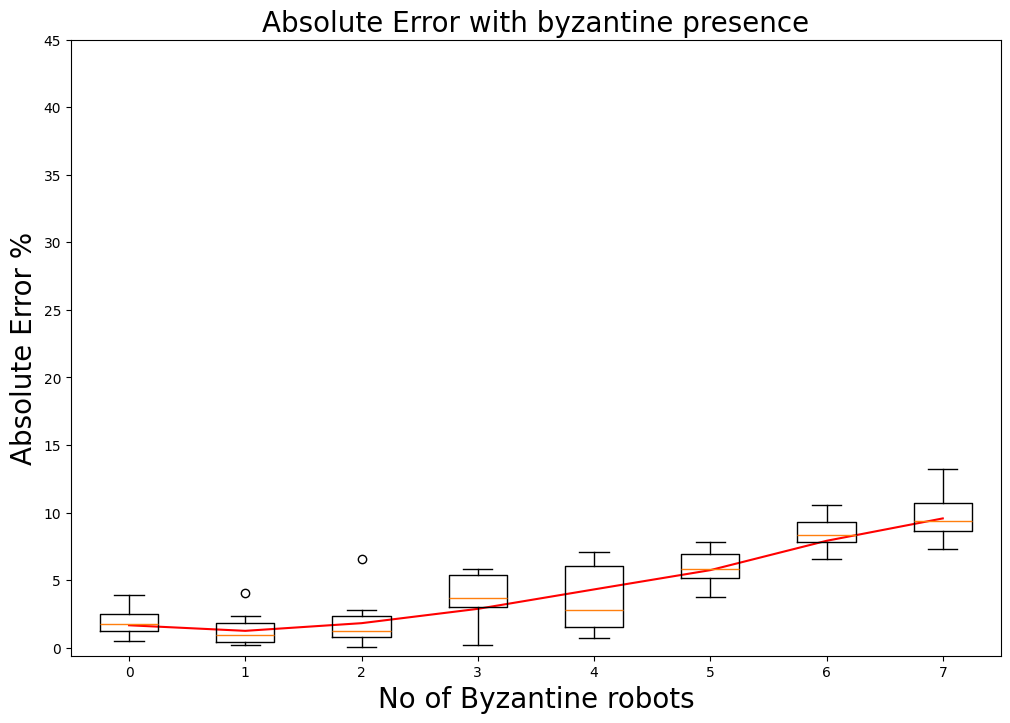

In [106]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_3 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine_0.3.csv")

plot_save_loess_byzantine(df_3,"Absolute Error with byzantine presence","AEByzantine.png")


<Figure size 1200x800 with 0 Axes>

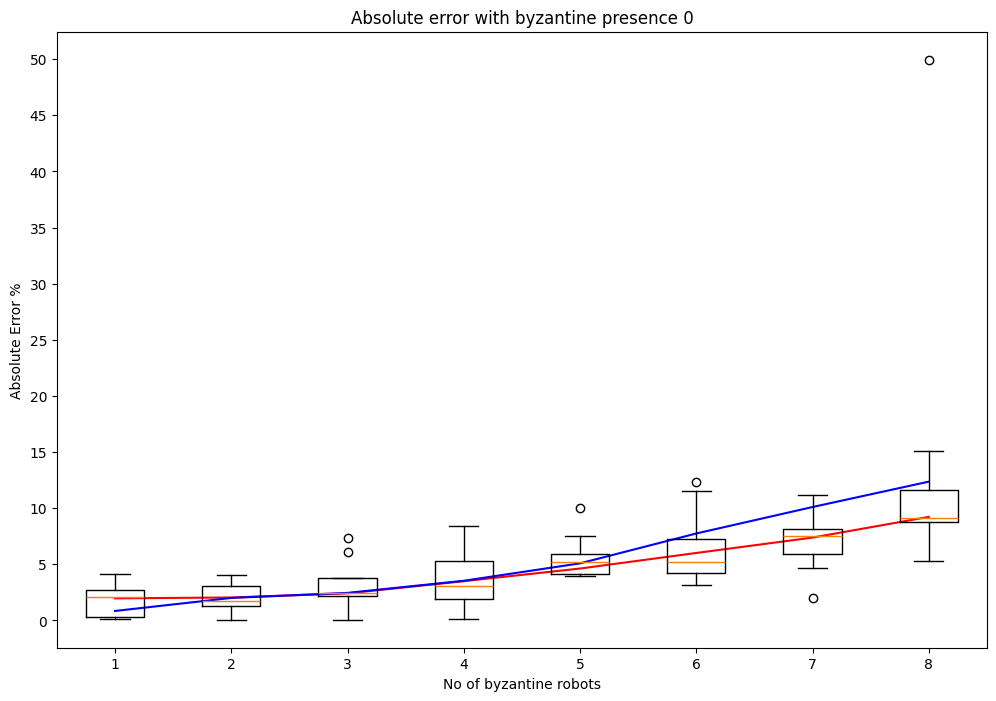

In [95]:
df_0 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine03_0.csv")

plot_save_loess_byzantine(df_0,"Absolute error with byzantine presence 0","No of byzantine robots", "Absolute Error %","AEByzantine0.png")


In [98]:
#Byzantine with random inputs
df_random = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine03Random.csvv")

plot_save_loess_byzantine(df_random, "Absolute Error with byzantine random inputs","No of byzantine robots","Absolute Error %", "AEByzantine.png")


FileNotFoundError: [Errno 2] No such file or directory: '/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine03Random.csvv'

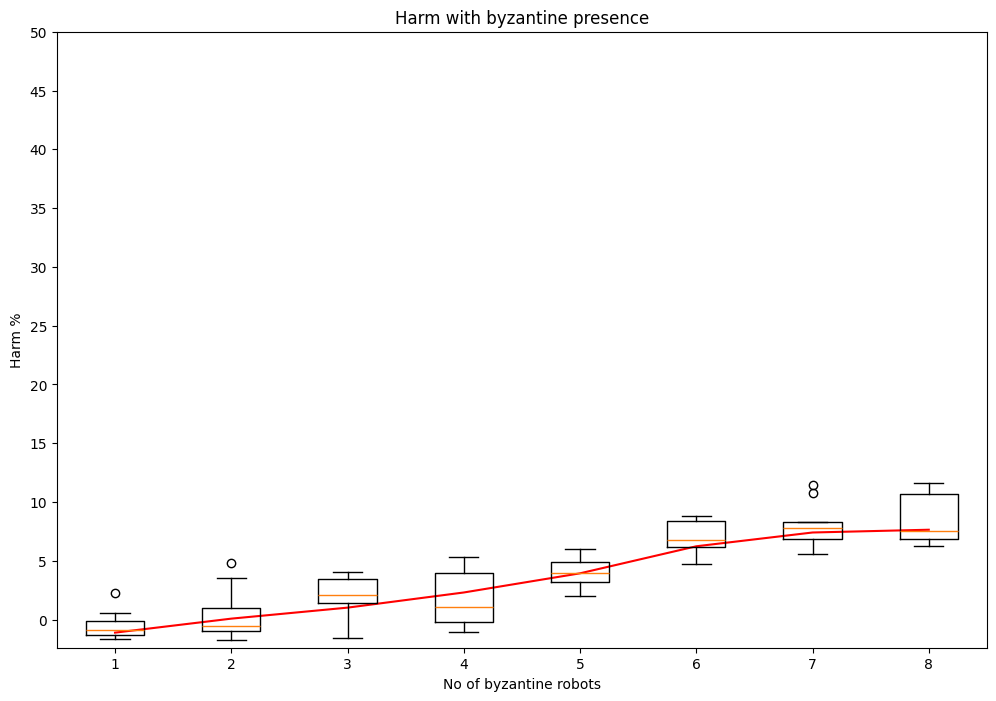

<Figure size 1200x800 with 0 Axes>

In [16]:
df_3_harm = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/byzantine03Harm.csv")

fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(1, df_3_harm.shape[1] + 1)
y = df_3_harm.median()

smoothed = lowess(y, x, frac=0.6)

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize=(12, 8))
AE_box = ax.boxplot([df_3_harm[col] for col in df_3_harm.columns],
                    tick_labels=df_3_harm.columns,
                    patch_artist=False)

ax.set_yticks([x for x in range(51) if x % 5 == 0])

ax.set_title("Harm with byzantine presence")
ax.set_ylabel("Harm %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("HarmByzantine.png")
plt.show()


Some plot showing the voting sucess by doing a line plot of the fraction of byzantine blocks, where each time there was a byzantine block it is when the voting system converged to the byzantine votes

Plotting consensus time 

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')
Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')


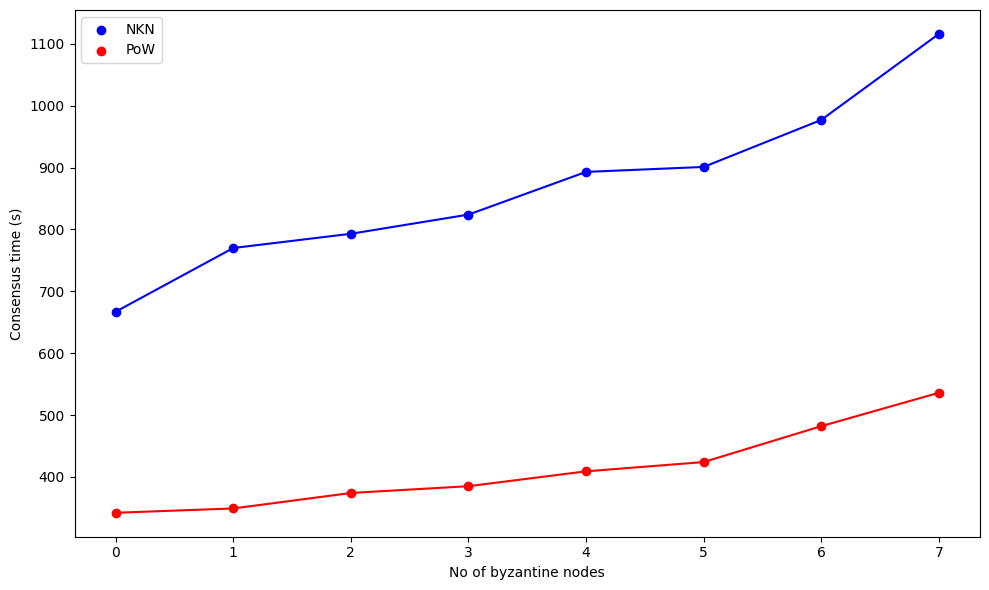

In [60]:
time_df = [pd.read_csv(
    "/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Consensus_time_means.csv"), pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/Strobel_byz_consensus_time_mean.csv")]

time_name = ["NKN Consensus time", "PoW Consensus time"]
save_same = ["NKNConsnsusPlot", "PoWConsensusPlot"]
    
def time_scatter(df1, df2, title, save_name):

    df1_mean = df1.mean()
    df2_mean = df2.mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_values = df1.columns

    ax.scatter(x_values, df1_mean, color='blue', s=36, label='NKN')
    ax.plot(x_values, df1_mean, color='blue')
    
    ax.scatter(x_values, df2_mean, color='red', s=36, label='PoW')
    ax.plot(x_values, df2_mean, color='red')
    
    
    ax.set_xlabel('No of byzantine nodes')
    ax.set_ylabel('Consensus time (s)')
    
    ax.legend()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.show()
    
time_scatter(time_df[0], time_df[1],"Comparison of consensus times","TimeGraph")

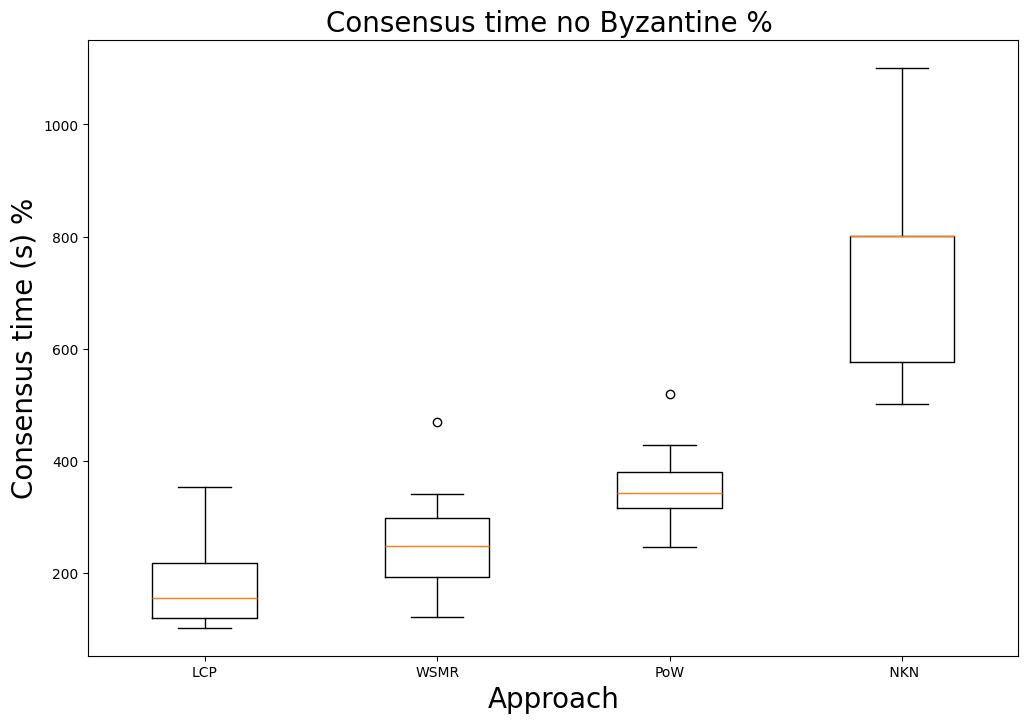

<Figure size 1200x800 with 0 Axes>

In [72]:
df_times = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/StrobelConsensusTimesAll.csv")

def plot_consensus_no_byz(df,save_name):
    fig, ax = plt.subplots(figsize = (12,8))

    plt.figure(figsize = (12,8))

    ax.boxplot([df[col] for col in df.columns],
           tick_labels = df.columns)

    ax.set_title("Consensus time no Byzantine % ", fontsize = 20)
    ax.set_ylabel("Consensus time (s) %", fontsize = 20)
    ax.set_xlabel("Approach", fontsize = 20)
    fig.savefig(save_name)
    plt.show()

plot_consensus_no_byz(df_times,"AllConsensusTimeNoByz")


CPU against number of robots

In [81]:
def extract_CPU(folder_names,file_name):
    df = pd.DataFrame()
    for folder_name in folder_names:
        path_to_data = "collected_results/CPU/byzantine_03_40_" + folder_name + "/001/0/simulation.csv"
        CPU_Df = pd.read_csv(path_to_data, sep=" ")
        df[folder_name] = [CPU_Df["CPU"].iloc[-1]]

    print(df)
    df.to_csv(file_name + ".csv", index=False)

folder_names = ["5","10","20","50","75","100"]

extract_CPU(folder_names,"CPU")


      5    10    20    50    75   100
0  53.4  52.8  53.3  56.2  57.0  59.1


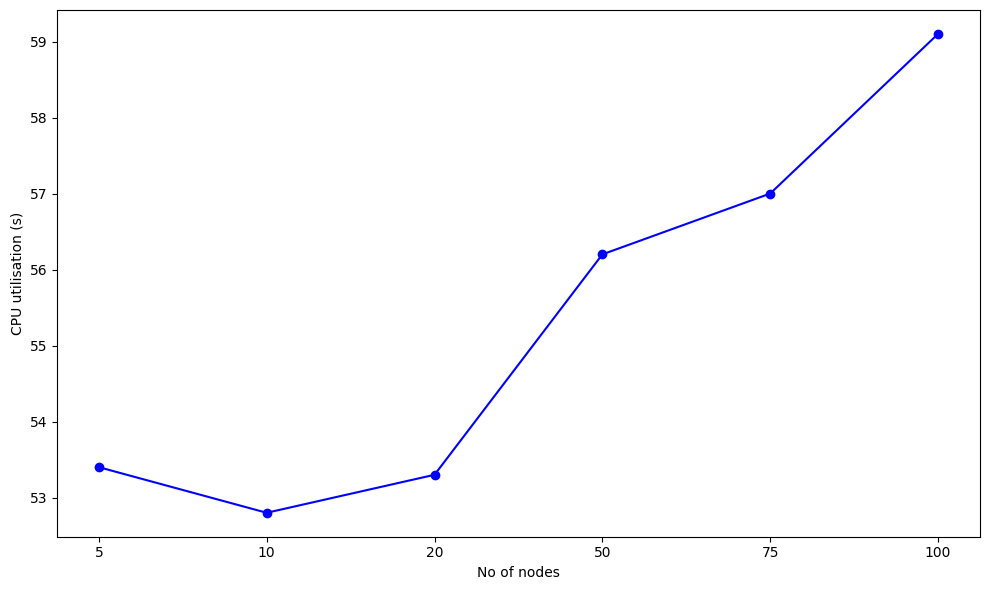

In [86]:
def plot_CPU(df,file_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    df_mean = df.mean()
    ax.scatter(df.columns, df_mean, color='blue', s=36, label='NKN')
    ax.plot(df.columns, df_mean, color='blue')
    ax.set_xlabel('No of nodes')
    ax.set_ylabel('CPU utilisation (s)')
    plt.tight_layout()
    fig.savefig(file_name)

df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/csvs/CPU.csv")

plot_CPU(df,"CPU_PLOT")

